In [32]:
# -*-coding=utf-8-*-
import pandas as pd
import jieba
import codecs
from lxml import etree
import numpy as np

In [3]:
f = codecs.open('news_tensite_xml.smarty.dat','r',encoding='utf-8')

In [4]:
content = f.read()

In [5]:
tree = etree.HTML(content)

In [6]:
docs = tree.xpath('//doc')

In [7]:
url = []
docno=[]
contenttitle=[]
content=[]
for doc in docs:
    url.append(doc.xpath('.//url/text()')[0])
    docno.append(doc.xpath('.//docno/text()')[0])    
    contenttitle.append(doc.xpath('.//contenttitle/text()')[0])   
    try:
        _content = doc.xpath('.//content/text()')[0]
    except:
        _content=None
    content.append(_content)

In [8]:
url

['http://news.sohu.com/20120612/n345428229.shtml',
 'http://news.sohu.com/20120607/n344998325.shtml',
 'http://news.sohu.com/20120604/n344745879.shtml',
 'http://news.sohu.com/20120613/n345535702.shtml',
 'http://news.sohu.com/20120601/n344598651.shtml',
 'http://news.sohu.com/20120606/n344833606.shtml',
 'http://news.sohu.com/20120608/n345059134.shtml',
 'http://news.sohu.com/20120602/n344660519.shtml',
 'http://news.sohu.com/20120611/n345278481.shtml',
 'http://news.sohu.com/20120615/n345707886.shtml',
 'http://news.sohu.com/20120604/n344744984.shtml',
 'http://news.sohu.com/20120531/n344566706.shtml',
 'http://news.sohu.com/20120601/n344623318.shtml',
 'http://news.sohu.com/s2011/meiguolongjuanfeng/',
 'http://news.sohu.com/20120609/n345155633.shtml',
 'http://news.sohu.com/20120608/n345105393.shtml',
 'http://biz.cn.yahoo.com/ypen/20120606/1094236.html',
 'http://biz.cn.yahoo.com/ypen/20120611/1102903.html',
 'http://biz.cn.yahoo.com/ypen/20120615/1115731.html',
 'http://biz.cn.yah

In [9]:
df = pd.DataFrame({'url':url,'title':contenttitle,'content':content,'docno':docno})

In [50]:
df.shape

(197, 4)

In [10]:
df_new=df.dropna()

In [51]:
df_new.shape

(163, 4)

In [55]:
jieba.lcut(df['content'][10])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xda\AppData\Local\Temp\jieba.cache
Loading model cost 0.926 seconds.
Prefix dict has been built succesfully.


['导读',
 '：',
 '４',
 '月',
 '２',
 '７',
 '日晚',
 '龙卷风',
 '和',
 '强',
 '风暴',
 '横扫',
 '美国',
 '东南部',
 '、',
 '随后',
 '是',
 '九个',
 '州',
 '，',
 '这场',
 '灾难',
 '造成',
 '的',
 '死亡',
 '人数',
 '可以',
 '说',
 '是',
 '美国',
 '历史',
 '上',
 '罕见',
 '的',
 '，',
 '已经',
 '超过',
 '１',
 '９',
 '７',
 '４',
 '年',
 '龙卷',
 '大',
 '爆发',
 '造成',
 '３',
 '１',
 '５',
 '人',
 '死亡',
 '的',
 '历史',
 '灾害',
 '，',
 '几乎',
 '成为',
 '１',
 '９',
 '３',
 '６',
 '年',
 '以来',
 '美国',
 '死亡',
 '人',
 '数最多',
 '的',
 '龙卷风',
 '灾害',
 '之一',
 '…',
 '［',
 '滚动',
 '］',
 '［',
 '图集',
 '］',
 '\ue40c',
 '美国',
 '中西部',
 '地区',
 '２',
 '２',
 '日',
 '遭遇',
 '超级',
 '龙卷风',
 '袭击',
 '，',
 '其中',
 '受灾',
 '最重',
 '的',
 '密苏里州',
 '乔普林',
 '市',
 '三分之一',
 '的',
 '面积',
 '被',
 '龙卷风',
 '“',
 '夷为平地',
 '”',
 '。',
 '至少',
 '有',
 '１',
 '１',
 '６',
 '人',
 '在',
 '本次',
 '风灾',
 '中',
 '遇难',
 '，',
 '创下',
 '近',
 '６',
 '０',
 '年',
 '来',
 '最',
 '惨痛',
 '纪录',
 '…',
 '［',
 '详细',
 '］']

In [51]:
stopword = codecs.open('stopword_hgd.txt','r',encoding='utf-8').readlines()
stopwords = [i.strip() for i in stopword]
stopword_df = pd.DataFrame({'stopword':stopwords})

In [52]:
contents = []
all_words=[]
for news_content in df_new['content'].tolist():
    
    cut_list = jieba.lcut(news_content)
    clean_word =[]
    for word in cut_list:
        if word in stopwords:
#             print(word)
            continue
        clean_word.append(word)
        all_words.append(word)
    contents.append(clean_word)


In [53]:
contents[0]

['中广网',
 '唐山',
 '月',
 '日',
 '消息',
 '记者',
 '汤一亮',
 '\u3000',
 '庄胜春',
 '中国',
 '之声',
 '新闻',
 '晚',
 '高峰',
 '报道',
 '日',
 '上午',
 '公安机关',
 '年缉枪',
 '制爆',
 '专项',
 '统一',
 '销毁',
 '非法',
 '枪爆',
 '物品',
 '活动',
 '河北',
 '唐山',
 '正式',
 '启动',
 '万余只',
 '非法',
 '枪支',
 '余吨',
 '炸药',
 '全国',
 '城市',
 '统一',
 '销毁',
 '\ue40c',
 '黄明',
 '全国',
 '缉枪',
 '制爆',
 '统一',
 '销毁',
 '\ue40c',
 '公安部',
 '副',
 '部长',
 '黄明',
 '一声令下',
 '仿制',
 '式',
 '枪',
 '猎枪',
 '火药枪',
 '气枪',
 '河北',
 '唐山',
 '钢铁厂',
 '投入',
 '炼钢炉',
 '全国',
 '省区市',
 '城市',
 '破案',
 '追缴',
 '群众',
 '主动',
 '上缴',
 '万余支',
 '非法',
 '枪支',
 '销毁',
 '全国',
 '指定',
 '场所',
 '余吨',
 '炸药',
 '销毁',
 '公安部',
 '治安',
 '局局长',
 '刘',
 '绍武',
 '介绍',
 '销毁',
 '非法',
 '枪支',
 '来源于',
 '三个',
 '\ue40c',
 '刘',
 '绍武',
 '打击',
 '破案',
 '涉黑',
 '涉恶',
 '团伙',
 '犯罪',
 '毒品',
 '犯罪',
 '境外',
 '非法',
 '走私',
 '枪支',
 '爆炸物',
 '\ue40c',
 '销毁',
 '现场',
 '记者',
 '追缴',
 '上缴',
 '各式各样',
 '枪支',
 '\ue40c',
 '刘',
 '绍武',
 '制式',
 '枪',
 '军用',
 '枪',
 '仿制',
 '制式',
 '抢',
 '猎枪',
 '私制',
 '火药枪',
 '我国',
 '枪支',
 '管理法',
 '严厉',
 '禁止',
 '非法',
 '持有',
 '中国',


In [55]:
len(all_words)

27304

In [56]:
df_clean = pd.DataFrame({'content_clean':contents})

In [57]:
df_clean.head()

,content_clean
0,"[中广网, 唐山, 月, 日, 消息, 记者, 汤一亮, , 庄胜春, 中国, 之声, 新..."
1,"[天津, 卫视, 求职, 节目, 非你莫属, 晕倒, 门, 事件, 余波, 未了, 主持人,..."
2,"[临沂, 山东, 年, 月, 日, , 夫妻, 麦客, 忙, 麦收, , 月, 日, 山..."
3,"[中广网, 北京, 月, 日, 消息, 记者, 王宇, 中国, 之声, 新闻, 晚, 高峰,..."
4,"[环球网, 记者, 李亮, 报道, 意大利, 度蜜月, 脸谱, 创始人, 扎克, 伯格, 华..."


In [58]:
df_new.head()

,url,title,content,docno
0,http://news.sohu.com/20120612/n345428229.shtml,公安机关销毁１０余万非法枪支 跨国武器走私渐起,中广网唐山６月１２日消息（记者汤一亮 庄胜春）据中国之声《新闻晚高峰》报道，今天（１２日）上...,c172394d49da2142-69713306c0bb3300
1,http://news.sohu.com/20120607/n344998325.shtml,张绍刚发道歉信网友不认可：他的问题是俯视他人（图）,天津卫视求职节目《非你莫属》“晕倒门”事件余波未了，主持人张绍刚前日通过《非你莫属》节目组发...,dbb4554e49da2142-69713306c0bb3300
2,http://news.sohu.com/20120604/n344745879.shtml,＃（关注夏收）（３）夫妻“麦客”忙麦收,临沂（山东），２０１２年６月４日 夫妻“麦客”忙麦收 ６月４日，在山东省临沂市郯城县郯城街道...,3fca104f49da2142-69713306c0bb3300
3,http://news.sohu.com/20120613/n345535702.shtml,欧洲杯大战在即 荷兰葡萄牙面临淘汰将背水一战,中广网北京６月１３日消息（记者王宇）据中国之声《新闻晚高峰》报道，明天凌晨两场欧洲杯的精彩比...,e4103f4f49da2142-69713306c0bb3300
4,http://news.sohu.com/20120601/n344598651.shtml,扎克伯格携妻罗马当街吃３０元麦当劳午餐（组图）,环球网记者李亮报道，正在意大利度蜜月的“脸谱”创始人扎克伯格与他华裔妻子的一举一动都处于媒体...,ab18525249da2142-69713306c0bb3300


In [59]:
df_all_words=pd.DataFrame({'all_words':all_words})
word_counts=df_all_words.groupby(by=['all_words'])['all_words'].agg({'count':np.size})

c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [60]:
word_counts.head()

,count
all_words,
°,1
÷,1
,329
一万余,1
一个个,1


In [61]:
words_counts=word_counts.reset_index().sort_values(by=['count'],ascending=False)
words_counts.head(10)

,all_words,count
8289,,833
2,,329
4640,月,254
4473,日,209
3330,年,152
445,中国,146
7787,银行,132
7013,记者,131
3933,投资,126
431,中,120


In [62]:
from wordcloud import WordCloud

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
import matplotlib

In [65]:
matplotlib.rcParams['figure.figsize']=(10.0,5.0)

In [69]:
wordcloud = WordCloud(font_path='xjlFont.ttf',background_color="white",max_font_size=80)
word_frequence={x[0]:x[1] for x in words_counts.head(100).values}

In [70]:
word_frequence

{'\ue40c': 833,
 '\u3000': 329,
 '月': 254,
 '日': 209,
 '年': 152,
 '中国': 146,
 '银行': 132,
 '记者': 131,
 '投资': 126,
 '中': 120,
 '说': 111,
 '经济': 101,
 '市场': 84,
 '权利': 83,
 '公司': 76,
 '时': 75,
 '企业': 74,
 '提供': 72,
 '利率': 69,
 '相关': 67,
 '内容': 64,
 '服务': 61,
 '存款': 59,
 '发展': 57,
 '雅虎': 54,
 '万元': 53,
 '政府': 52,
 '部门': 52,
 '通知': 51,
 '新': 50,
 '基金': 50,
 '显示': 50,
 '元': 48,
 '叙利亚': 48,
 '资金': 47,
 '文化': 47,
 '发生': 47,
 '人员': 46,
 '信息': 46,
 '政策': 44,
 '报道': 43,
 '法律': 43,
 '风险': 42,
 '收益': 42,
 '生产': 42,
 '情况': 42,
 '管理': 41,
 '需求': 41,
 '建设': 40,
 '应': 40,
 '产品': 40,
 '制度': 39,
 '贷款': 39,
 '国家': 38,
 '降息': 38,
 '亿元': 37,
 '平台': 37,
 '称': 37,
 '食品安全': 37,
 '资产': 36,
 '用户': 36,
 '信托': 36,
 'ｌ': 35,
 '价格': 35,
 '国际': 34,
 '美国': 34,
 '大连': 34,
 '我国': 33,
 '国内': 33,
 '方式': 33,
 '监管': 33,
 '北京': 32,
 '岁': 32,
 '调查': 32,
 '开放': 32,
 '报告': 32,
 '高': 31,
 'Ｐ': 31,
 '消息': 30,
 '食品': 30,
 '网友': 30,
 '昨日': 30,
 '时间': 29,
 '高尔夫球场': 29,
 '退税': 29,
 '出口': 29,
 '提示': 29,
 '去年': 29,
 '理财产品': 29,
 '尊重': 

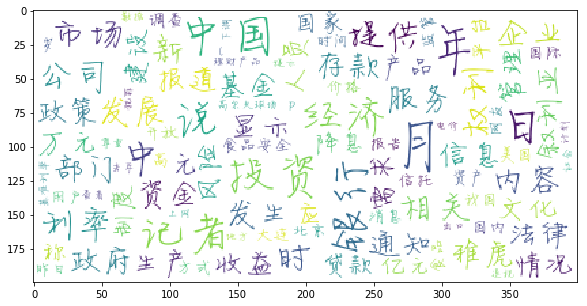

In [71]:
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [74]:
import jieba.analyse

In [80]:
index =53
word_=df_new['content'][index]
jieba.analyse.extract_tags(word_,topK=10,withWeight=True)

[('食品安全', 0.39322632137794605),
 ('食品质量', 0.20665389786535268),
 ('食品', 0.18272522605892114),
 ('质检', 0.13284151914126557),
 ('宣传周', 0.11535832076348548),
 ('诚信', 0.10280627279302905),
 ('保障', 0.08798504587141079),
 ('总局', 0.07118396408995852),
 ('安全', 0.06902860278074689),
 ('监管', 0.06224877934481328)]

In [81]:
from gensim import corpora,models,similarities

c:\python36\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [83]:
import gensim

In [84]:
dictionary = corpora.Dictionary(contents)

In [85]:
corpus = [dictionary.doc2bow(sentence) for sentence in contents]

In [98]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=20)

In [99]:
for topic in lda.print_topics(num_topics=20,num_words=7):
    print(topic[1])

0.010*"月" + 0.010*"" + 0.010*"经济" + 0.010*"　" + 0.005*"亿元" + 0.005*"彭年" + 0.005*"企业家"
0.010*"" + 0.004*"月" + 0.004*"日" + 0.003*"年" + 0.003*"劳工" + 0.003*"中国" + 0.003*"　"
0.029*"" + 0.011*"月" + 0.008*"日" + 0.007*"中国" + 0.007*"　" + 0.005*"权利" + 0.004*"利率"
0.031*"" + 0.019*"　" + 0.014*"权利" + 0.011*"中国" + 0.010*"银行" + 0.010*"内容" + 0.009*"提供"
0.006*"防腐剂" + 0.005*"字" + 0.004*"消费者" + 0.004*"防腐" + 0.004*"文化" + 0.004*"" + 0.003*"　"
0.030*"" + 0.014*"　" + 0.010*"日" + 0.009*"月" + 0.005*"说" + 0.005*"中" + 0.004*"企业"
0.008*"" + 0.006*"月" + 0.005*"日" + 0.004*"面粉" + 0.004*"投资" + 0.004*"　" + 0.004*"资产"
0.019*"" + 0.010*"月" + 0.008*"年" + 0.007*"　" + 0.006*"日" + 0.006*"经济" + 0.006*"中国"
0.021*"" + 0.009*"投资" + 0.007*"退税" + 0.006*"部门" + 0.006*"政府" + 0.006*"量化" + 0.006*"资金"
0.020*"" + 0.007*"月" + 0.006*"投资" + 0.005*"日" + 0.005*"年" + 0.005*"　" + 0.005*"文化"
0.017*"" + 0.010*"银行" + 0.010*"存款" + 0.006*"　" + 0.006*"月" + 0.005*"日" + 0.004*"利率"
0.029*"" + 0.011*"　" + 0.007*"日" + 0.007*"银行" + 0.006*"月" +

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
texts=['dog cat fish','dog cat cat','fish bird','bird']
cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)

In [102]:
print(cv.get_feature_names())

['bird', 'cat', 'dog', 'fish']


In [103]:
print(cv_fit.toarray())

[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]


In [104]:
print(cv_fit.toarray().sum(axis=0))

[2 3 2 2]


In [105]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1,4))
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]
